In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
MODEL_BINARY = "/content/drive/MyDrive/vgg16_binary_model.h5"
MODEL_MULTI  = "/content/drive/MyDrive/vgg16_multiclass_model.h5"

In [4]:
binary_model = tf.keras.models.load_model(MODEL_BINARY)
multiclass_model = tf.keras.models.load_model(MODEL_MULTI)

print("Models loaded successfully!")

Models loaded successfully!


In [5]:
MAG_LABELS = ["10x", "40x", "100x", "400x"]
BINARY_LABELS = ["benign", "malignant"]

# UPDATE WITH YOUR REAL MULTICLASS LABELS:
MULTICLASS_LABELS = [
     "adenosis", "ductal_carcinoma", "fibroadenoma", "lobular_carcinoma",
    "mucinous_carcinoma", "papillary_carcinoma", "phyllodes_tumor", "tubular_adenoma"
]

IMG_SIZE = (224,224)

In [6]:
def preprocess(img):
    img = img.convert("RGB").resize(IMG_SIZE)
    arr = np.array(img) / 255.0
    return np.expand_dims(arr, axis=0)

Saving image8.png to image8.png


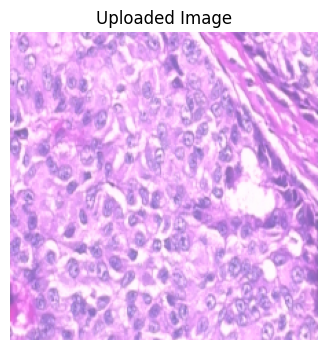

In [9]:
uploaded = files.upload()

file_name = next(iter(uploaded.keys()))
img = Image.open(io.BytesIO(uploaded[file_name]))

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.title("Uploaded Image")
plt.axis("off")
plt.show()

input_arr = preprocess(img)

In [10]:
# ======================
# 🔵 BINARY MODEL
# ======================
print("======================================")
print("🔵 BINARY MODEL PREDICTION")
print("======================================")

binary_pred = binary_model.predict(input_arr)[0][0]

label = "malignant" if binary_pred > 0.5 else "benign"
confidence = binary_pred if binary_pred > 0.5 else (1 - binary_pred)

print(f"Diagnosis (Binary Model): {label} ({confidence*100:.2f}%)")


# ======================
# 🟣 MULTICLASS MODEL
# ======================
print("\n======================================")
print("🟣 MULTICLASS MODEL PREDICTIONS")
print("======================================")

multi_preds = multiclass_model.predict(input_arr)

class_pred = multi_preds[0] if isinstance(multi_preds, list) else multi_preds
class_pred = class_pred[0]

tumor_idx = np.argmax(class_pred)

print(f"Tumor Class (Multiclass Model): {MULTICLASS_LABELS[tumor_idx]} "
      f"({class_pred[tumor_idx]*100:.2f}%)")

print("\n🎉 Predictions completed successfully!")

🔵 BINARY MODEL PREDICTION
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step
Diagnosis (Binary Model): malignant (100.00%)

🟣 MULTICLASS MODEL PREDICTIONS
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
Tumor Class (Multiclass Model): ductal_carcinoma (70.81%)

🎉 Predictions completed successfully!
